In [12]:
import numpy
import scipy, scipy.optimize
import matplotlib.pyplot as mpl

# In-Class Exercise for 25 June 2018
## Importing and fitting temperature data

Often, the working physicist encounters relatively raw data from which they must extract knowledge.

In today's exercise, you will perform a few tasks:

* Use numpy.loadtxt to load a data file into a numpy array
* Create a rolling average of the data and visualize it.
* Create an error function to be minimized, and minimize it.



## Loading the data and creating the rolling average
Load the NASA temperature data file posted on Moodle. (you'll probably need to right-click-save-as on the file.)

This data file is tab-delimited (the tab character is "\t").
* Use numpy.loadtxt to load the data file into an array.

In [13]:
Data = numpy.loadtxt('647_Global_Temperature_Data_File.txt',delimiter='\t')

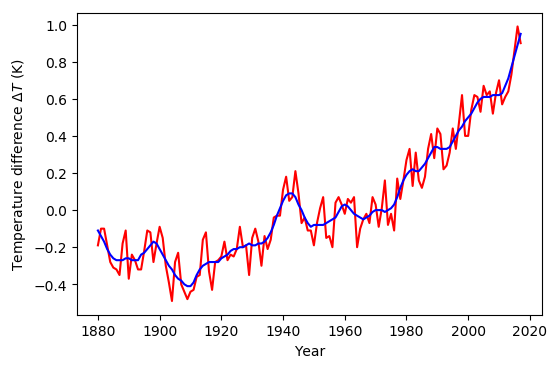

In [14]:
# Plot the loaded data

Graph1 = mpl.figure(dpi=100)
mpl.plot(Data[:,0],Data[:,1],color='red')
mpl.plot(Data[:,0],Data[:,2],color='blue')
mpl.xlabel('Year')
mpl.ylabel('Temperature difference $\Delta T$ (K)')
mpl.show()

* Create a rolling average of the data, using a five-year-wide window, and plot the result (and the original data).

In [15]:
# A rolling average in a 5-year-wide window

Avg_in5years = numpy.zeros_like(Data[:,1])

# Average temperature in 5 years from the 3rd year to the 3rd last year
Avg_in5years[2:-2] = (Data[0:-4,1] + Data[1:-3,1] + Data[2:-2,1] + Data[3:-1,1] + Data[4:,1]) / 5

# For the first two and last two years
Avg_in5years[0] = (Data[0,1] + Data[1,1] + Data[2,1]) / 3
Avg_in5years[1] = (Data[0,1] + Data[1,1] + Data[2,1] + Data[3,1]) / 4
Avg_in5years[-2] = (Data[-1,1] + Data[-2,1] + Data[-3,1] + Data[-4,1]) / 4
Avg_in5years[-1] = (Data[-1,1] + Data[-2,1] + Data[-3,1]) / 3

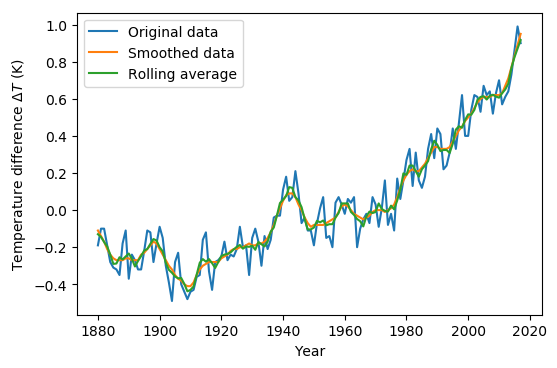

In [16]:
Graph2 = mpl.figure(dpi=100)
mpl.plot(Data[:,0],Data[:,1],label="Original data")
mpl.plot(Data[:,0],Data[:,2],label="Smoothed data")
mpl.plot(Data[:,0],Avg_in5years,label="Rolling average")
mpl.xlabel('Year')
mpl.ylabel('Temperature difference $\Delta T$ (K)')
mpl.legend(loc='best')
mpl.show()

## Creating and minimizing an error function to fit the data

Now, you'll fit the data to a function.

$$ T_\mathrm{fit}(year) = T_0 + a \cdot \exp(b \cdot [year - 1965] )$$

* Define the $T_\mathrm{fit}$ function T_fit with the appropriate free parameters.
* Create a function Er that calculates the error between T_fit(parameters) and the data.
* Use scipy.optimize.minimize to minimize Er. (try the default fitting method and the "CG" method you'll need for your homework)
* Use plots to compare the data fits to the original data.

In [17]:
# Define the fit function
def T_model(year, T0, a, b):
    y = T0 + a*numpy.exp(b*(year-1965))
    return y

In [18]:
# Define the error function
def chi_sq(p, y, x):
    T0, a, b = p
    err = sum((y - T_model(x, T0, a, b))**2 / y.var(ddof=1))
    return err

In [19]:
p0 = numpy.asarray([0.01, 0.01, 0.01])
res = scipy.optimize.minimize(chi_sq, p0, args=(Data[:,1], Data[:,0]), method='CG')
print(res.x)

[-0.32878317  0.34726603  0.0237329 ]


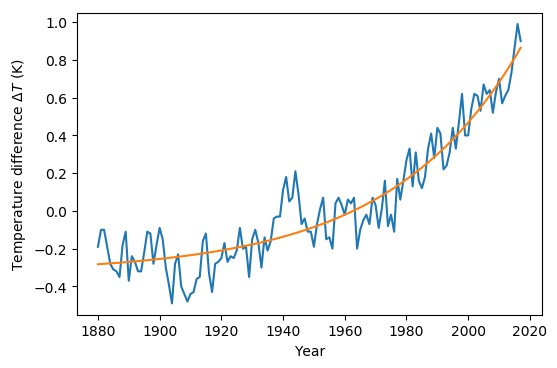

In [20]:
Fit_func = res.x[0] + res.x[1]*numpy.exp(res.x[2]*(Data[:,0]-1965))

Graph3 = mpl.figure(dpi=100)
mpl.plot(Data[:,0],Data[:,1])
mpl.plot(Data[:,0],Fit_func)
mpl.xlabel('Year')
mpl.ylabel('Temperature difference $\Delta T$ (K)')
mpl.ylim(-0.55,1.05)
mpl.show()

### Note: Your homework this week requires a damped oscillator, which was covered in the 28 May in-class exercise.